In [1]:
import tensorflow as tf
from keras.utils import plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

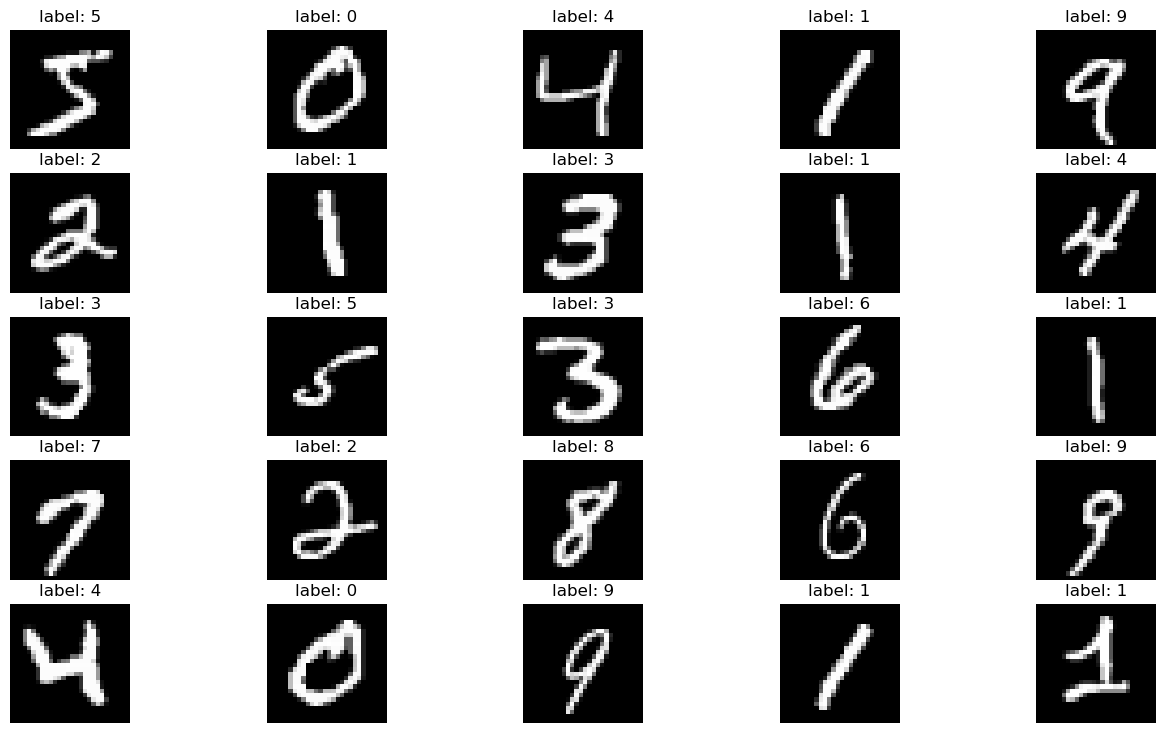

In [4]:
plt.figure(figsize=(16,9))
for i in range(1,26):
        plt.subplot(5,5,i)
        plt.title(f'label: {y_train[i-1]}')
        plt.imshow(x_train[i-1], cmap='gray')
        plt.axis('off')

In [5]:
x_train[2].shape

(28, 28)

In [6]:
# NORMALISE

x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train_copy = x_train.reshape(-1,x_train[0].size)
x_train_copy.shape

(60000, 784)

In [8]:
x_test_copy = x_test.reshape(-1, x_test[0].size)
x_test_copy.shape

(10000, 784)

### One hot encode y using to_categorical

In [9]:
from keras.utils import to_categorical

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [10]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 573,910 (2.19 MB)

 Trainable params: 573,910 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [13]:
hist = model.fit(x_train_copy, y_train_new, validation_data=[x_test_copy, y_test_new], epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9387 - loss: 0.1988 - val_accuracy: 0.9622 - val_loss: 0.1169
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9728 - loss: 0.0890 - val_accuracy: 0.9756 - val_loss: 0.0807
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9806 - loss: 0.0630 - val_accuracy: 0.9655 - val_loss: 0.1098
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9854 - loss: 0.0458 - val_accuracy: 0.9750 - val_loss: 0.0950
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9720 - val_loss: 0.0994


In [16]:
model.evaluate(x_test_copy, y_test_new, batch_size=1)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9720 - loss: 0.0994


[0.0993882566690445, 0.972000002861023]

In [ ]:
import cv2

In [54]:
new_char = cv2.imread('../input/images/new-char1.jpg', 0) # read in grayscale
new_char = cv2.resize(new_char, dsize=(28, 28)) # resize to 28 * 28
thresh, new_char = cv2.threshold(new_char, 127, 255, cv2.THRESH_BINARY_INV) # invert

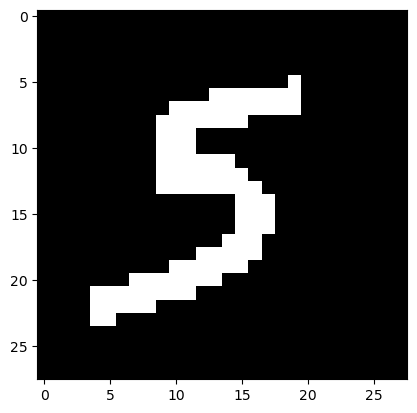

In [55]:

plt.imshow(new_char, cmap='gray')

In [56]:
new_char = new_char.reshape(1, 784) # reshape to match model input

In [57]:
res = np.argmax(model.predict(new_char, verbose=False))
res

np.int64(5)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss='sparse_categoricalcrossentropy', optimizer='adam', metrics=['accuracy'])


In [66]:
hist = model.fit(x_train_copy, y_train_new, validation_data=(x_test_copy, y_test_new), epochs=10)

Epoch 1/10


ValueError: Sequential model 'sequential_3' has already been configured to use input shape (None, 28, 28). You cannot build it with input_shape (32, 784)